In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras import layers
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

loading dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)

Firstly we set all parameters to fixed values, and then proceed with parameter tuning. We chose 13 hyperparametwes to train our model.

In [ ]:
#Training Hyperparameters
num_classes = 10
regularization = "l2"
dropout_rate = 0.3
dropout = "TRUE"
num_classes = 10
learning_rate = 0.0001
Regularization_rate = 0.0001
dropout_rate = 0.3
lay_num = 3
dense_units = 128
epochs = 20
batch_size = 64
activation = 'relu'
optimizer = 'adam'
kernel_initialize = "glorot_uniform"

# Different learning_rate for MLP

 We set different learning_rate like 0.001,0.0001, 0.00001 etc that is common in deep learning and we fix other parameters. As a result, we will find best learning_rate to fit this model.


In [ ]:
learning_rate_histories = {}
learning_rates = [0.001, 0.0001, 0.00001, 0.000001, 0.01]

for learning_rate in learning_rates:
    if optimizer.lower() == 'adam':
        optimizer_instance = keras.optimizers.Adam(learning_rate)
    elif optimizer.lower() == 'sgd':
        optimizer_instance = keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer.lower() == 'adagrad':
        optimizer_instance = keras.optimizers.Adagrad(learning_rate)
    elif optimizer.lower() == 'rmsprop':
        optimizer_instance = keras.optimizers.RMSprop(learning_rate)
    elif optimizer.lower() == 'adamax':
        optimizer_instance = keras.optimizers.Adamax(learning_rate)
    elif optimizer.lower() == 'nadam':
        optimizer_instance = keras.optimizers.Nadam(learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")
    if kernel_initialize == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initialize == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initialize == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initialize == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initialize == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initialize == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        raise ValueError(f"Unsupported initializer: {kernel_initialize}")
    if regularization == "l1":
        kernel_regularizer = keras.regularizers.l1(Regularization_rate)
    elif regularization == "l2":
        kernel_regularizer = keras.regularizers.l2(Regularization_rate)
    elif regularization == "l1_l2":
        kernel_regularizer = keras.regularizers.l1_l2(l1=Regularization_rate, l2=Regularization_rate)
    else:
        kernel_regularizer = None
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[28, 28]))
    for _ in range(lay_num):
        if dropout == "TRUE":
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initialize, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer_instance,
                  metrics=["accuracy"])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=1)
    learning_rate_histories[learning_rate] = {
        'accuracy': history.history['accuracy'],
        'loss': history.history['loss'],
        'val_accuracy': history.history['val_accuracy'],
        'val_loss': history.history['val_loss']
    }

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6402 - loss: 1.0162 - val_accuracy: 0.8310 - val_loss: 0.5036
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8030 - loss: 0.5929 - val_accuracy: 0.8433 - val_loss: 0.4784
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.5412 - val_accuracy: 0.8532 - val_loss: 0.4574
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8287 - loss: 0.5208 - val_accuracy: 0.8620 - val_loss: 0.4371
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8340 - loss: 0.5119 - val_accuracy: 0.8652 - val_loss: 0.4272
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8346 - loss: 0.4996 - val_accuracy: 0.8687 - val_loss: 0.4299
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8393 - loss: 0.4940 - val_accuracy: 0.8688 - val_loss: 0.4164
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 0.4872 - val_accuracy: 

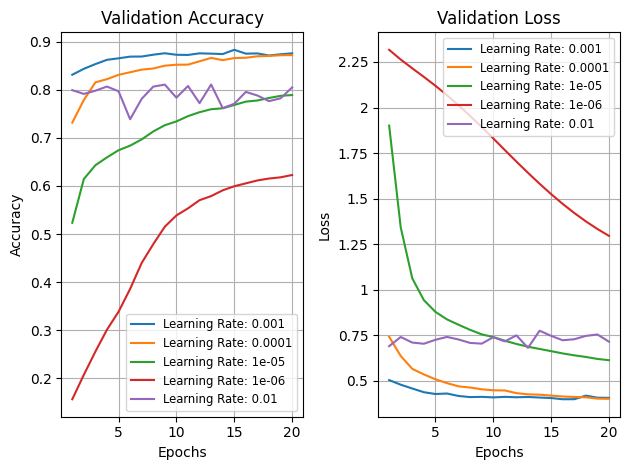

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_learning_rate_histories(histories):

    plt.subplot(1, 2, 1)
    for lr, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_accuracy']) + 1), metrics['val_accuracy'], label=f'Learning Rate: {lr}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.grid()
    plt.subplot(1, 2, 2)
    for lr, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_loss']) + 1), metrics['val_loss'], label=f'Learning Rate: {lr}')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'.rstrip('0').rstrip('.')))
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize='small')
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_learning_rate_histories(learning_rate_histories)




# Different regularization types For MLP

In this part, we set 3 values for regularization_types like l1,l2,l1_l2 to identify which one perform best.

In [ ]:
# Define different regularization types
regularization_types = ["l1", "l2", "l1_l2"]
regularization_histories = {}
for regularization in regularization_types:
    if optimizer.lower() == 'adam':
        optimizer_instance = keras.optimizers.Adam(learning_rate)
    elif optimizer.lower() == 'sgd':
        optimizer_instance = keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer.lower() == 'adagrad':
        optimizer_instance = keras.optimizers.Adagrad(learning_rate)
    elif optimizer.lower() == 'rmsprop':
        optimizer_instance = keras.optimizers.RMSprop(learning_rate)
    elif optimizer.lower() == 'adamax':
        optimizer_instance = keras.optimizers.Adamax(learning_rate)
    elif optimizer.lower() == 'nadam':
        optimizer_instance = keras.optimizers.Nadam(learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")
    if kernel_initialize == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initialize == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initialize == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initialize == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initialize == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initialize == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        raise ValueError(f"Unsupported initializer: {kernel_initialize}")
    if regularization == "l1":
        kernel_regularizer = keras.regularizers.l1(Regularization_rate)
    elif regularization == "l2":
        kernel_regularizer = keras.regularizers.l2(Regularization_rate)
    elif regularization == "l1_l2":
        kernel_regularizer = keras.regularizers.l1_l2(l1=Regularization_rate, l2=Regularization_rate)
    else:
        kernel_regularizer = None
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[28, 28]))

    for _ in range(lay_num):
        if dropout == "TRUE":
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer_instance,
                  metrics=["accuracy"])
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=1)

    regularization_histories[regularization if regularization else "None"] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }
    data_dict = {
        'regularization': regularization if regularization else "None",
        'epochs': epochs,
        'accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }
    df = pd.DataFrame([data_dict])
    csv_file = 'training_results.csv'
    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4098 - loss: 2.2508 - val_accuracy: 0.7303 - val_loss: 1.2805
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7100 - loss: 1.3614 - val_accuracy: 0.7898 - val_loss: 1.1166
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7532 - loss: 1.2052 - val_accuracy: 0.8055 - val_loss: 1.0297
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7801 - loss: 1.1088 - val_accuracy: 0.8248 - val_loss: 0.9714
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7916 - loss: 1.0565 - val_accuracy: 0.8287 - val_loss: 0.9267
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 1.0056 - val_accuracy: 0.8365 - val_loss: 0.8887
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8107 - loss: 0.9660 - val_accuracy: 0.8392 - val_loss: 0.8565
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.9360 - val_accuracy: 0.

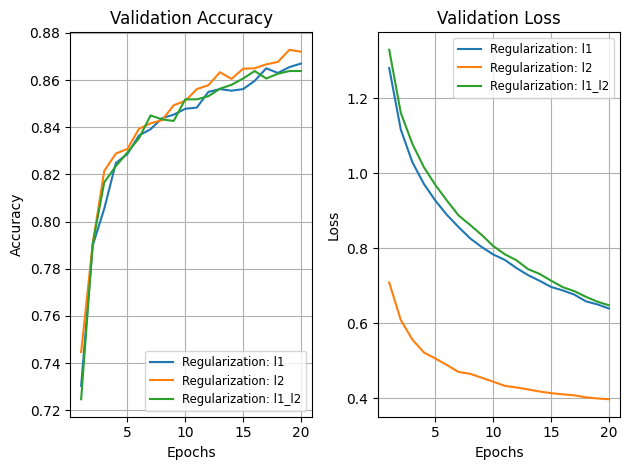

In [ ]:
def plot_regularization_histories(histories):
    plt.subplot(1, 2, 1)
    for reg_type, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_accuracy']) + 1), metrics['val_accuracy'], label=f'Regularization: {reg_type}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.grid()
    plt.subplot(1, 2, 2)
    for reg_type, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_loss']) + 1), metrics['val_loss'], label=f'Regularization: {reg_type}')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize='small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_regularization_histories(regularization_histories)


# Different regularization rates to test with L2 regularization

We set 4 values which are common in regularization rates. we find the best one is 0.0001


In [ ]:
# Define different regularization rates to test with L2 regularization
regularization_rates = [0.01, 0.001, 0.0001, 0.00001]
regularization_histories = {}
for reg_rate in regularization_rates:
    if optimizer.lower() == 'adam':
        optimizer_instance = keras.optimizers.Adam(learning_rate)
    elif optimizer.lower() == 'sgd':
        optimizer_instance = keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer.lower() == 'adagrad':
        optimizer_instance = keras.optimizers.Adagrad(learning_rate)
    elif optimizer.lower() == 'rmsprop':
        optimizer_instance = keras.optimizers.RMSprop(learning_rate)
    elif optimizer.lower() == 'adamax':
        optimizer_instance = keras.optimizers.Adamax(learning_rate)
    elif optimizer.lower() == 'nadam':
        optimizer_instance = keras.optimizers.Nadam(learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")
    if kernel_initialize == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initialize == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initialize == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initialize == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initialize == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initialize == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        raise ValueError(f"Unsupported initializer: {kernel_initialize}")
    kernel_regularizer = keras.regularizers.l2(reg_rate)
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[28, 28]))

    for _ in range(lay_num):
        if dropout == "TRUE":
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer_instance,
                  metrics=["accuracy"])
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=1)
    regularization_histories[reg_rate] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

    data_dict = {
        'regularization_type': 'l2',
        'regularization_rate': reg_rate,
        'epochs': epochs,
        'accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }

    df = pd.DataFrame([data_dict])
    csv_file = 'regularization_rates.csv'
    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, mode='w', header=True, index=False)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4053 - loss: 5.4545 - val_accuracy: 0.7268 - val_loss: 2.8080
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6996 - loss: 2.6247 - val_accuracy: 0.7753 - val_loss: 1.8038
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7473 - loss: 1.7625 - val_accuracy: 0.8007 - val_loss: 1.3391
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7626 - loss: 1.3548 - val_accuracy: 0.8068 - val_loss: 1.0927
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7731 - loss: 1.1412 - val_accuracy: 0.8088 - val_loss: 0.9589
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7845 - loss: 1.0083 - val_accuracy: 0.8110 - val_loss: 0.8802
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7876 - loss: 0.9316 - val_accuracy: 0.8138 - val_loss: 0.8275
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7880 - loss: 0.8899 - val_accuracy: 0.

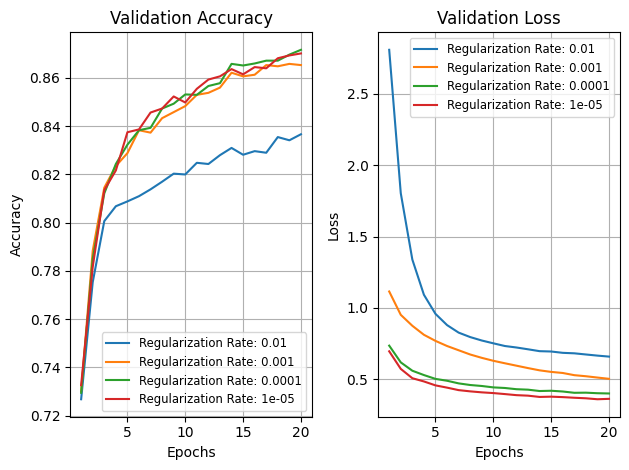

In [ ]:
import matplotlib.pyplot as plt
def plot_regularization_histories(histories):
    plt.subplot(1, 2, 1)
    for reg_rate, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_accuracy']) + 1), metrics['val_accuracy'], label=f'Regularization Rate: {reg_rate}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for reg_rate, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_loss']) + 1), metrics['val_loss'], label=f'Regularization Rate: {reg_rate}')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize='small')
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_regularization_histories(regularization_histories)

# Differnt dropout_rate

In this part, we aslo chose 5 dropout_rate to train this model while keeping all other parameters constant.

In [ ]:
# differnt dropout
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
dropout_histories = {}
for dropout_rate in dropout_rates:
    if optimizer.lower() == 'adam':
        optimizer_instance = keras.optimizers.Adam(learning_rate)
    elif optimizer.lower() == 'sgd':
        optimizer_instance = keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer.lower() == 'adagrad':
        optimizer_instance = keras.optimizers.Adagrad(learning_rate)
    elif optimizer.lower() == 'rmsprop':
        optimizer_instance = keras.optimizers.RMSprop(learning_rate)
    elif optimizer.lower() == 'adamax':
        optimizer_instance = keras.optimizers.Adamax(learning_rate)
    elif optimizer.lower() == 'nadam':
        optimizer_instance = keras.optimizers.Nadam(learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    if kernel_initialize == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initialize == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initialize == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initialize == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initialize == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initialize == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        raise ValueError(f"Unsupported initializer: {kernel_initialize}")

    if regularization == "l1":
        kernel_regularizer = keras.regularizers.l1(Regularization_rate)
    elif regularization == "l2":
        kernel_regularizer = keras.regularizers.l2(Regularization_rate)
    elif regularization == "l1_l2":
        kernel_regularizer = keras.regularizers.l1_l2(l1=Regularization_rate, l2=Regularization_rate)
    else:
        kernel_regularizer = None
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[28, 28]))
    for _ in range(lay_num):
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer_instance,
                  metrics=["accuracy"])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=1)
    dropout_histories[dropout_rate] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }
    data_dict = {
        'dropout_rate': dropout_rate,
        'epochs': epochs,
        'accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }

    df = pd.DataFrame([data_dict])
    csv_file = 'dropout_results.csv'
    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, mode='w', header=True, index=False)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5552 - loss: 1.9504 - val_accuracy: 0.8065 - val_loss: 1.1582
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: 1.1739 - val_accuracy: 0.8287 - val_loss: 1.0405
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8228 - loss: 1.0687 - val_accuracy: 0.8425 - val_loss: 0.9641
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8356 - loss: 0.9901 - val_accuracy: 0.8468 - val_loss: 0.9167
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8407 - loss: 0.9418 - val_accuracy: 0.8538 - val_loss: 0.8689
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8450 - loss: 0.9004 - val_accuracy: 0.8563 - val_loss: 0.8425
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8519 - loss: 0.8603 - val_accuracy: 0.8600 - val_loss: 0.8110
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8534 - loss: 0.8299 - val_accuracy: 0.

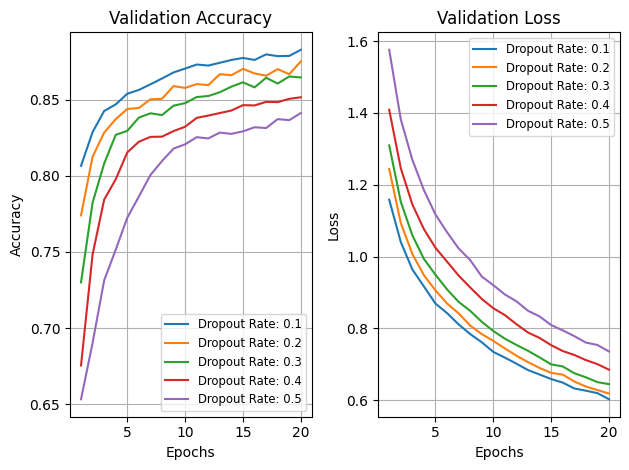

In [ ]:
import matplotlib.pyplot as plt
def plot_dropout_histories(histories):
    plt.subplot(1, 2, 1)
    for rate, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_accuracy']) + 1), metrics['val_accuracy'], label=f'Dropout Rate: {rate}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.grid()
    plt.subplot(1, 2, 2)
    for rate, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_loss']) + 1), metrics['val_loss'], label=f'Dropout Rate: {rate}')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize='small')
    plt.grid()
    plt.tight_layout()
    plt.show()
plot_dropout_histories(dropout_histories)


# Different kernel initializers

In [ ]:
# Define different kernel initializers
kernel_initializers = ["random_normal", "glorot_normal", "he_normal", "glorot_uniform", "he_uniform", "random_uniform"]
initializer_histories = {}
for initializer in kernel_initializers:
    if optimizer.lower() == 'adam':
        optimizer_instance = keras.optimizers.Adam(learning_rate)
    elif optimizer.lower() == 'sgd':
        optimizer_instance = keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer.lower() == 'adagrad':
        optimizer_instance = keras.optimizers.Adagrad(learning_rate)
    elif optimizer.lower() == 'rmsprop':
        optimizer_instance = keras.optimizers.RMSprop(learning_rate)
    elif optimizer.lower() == 'adamax':
        optimizer_instance = keras.optimizers.Adamax(learning_rate)
    elif optimizer.lower() == 'nadam':
        optimizer_instance = keras.optimizers.Nadam(learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")
    if initializer == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif initializer == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif initializer == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif initializer == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif initializer == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif initializer == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        raise ValueError(f"Unsupported initializer: {initializer}")

    kernel_regularizer = keras.regularizers.l2(Regularization_rate)

    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[28, 28]))

    for _ in range(lay_num):
        if dropout == "TRUE":
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer_instance,
                  metrics=["accuracy"])
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=1)

    initializer_histories[initializer] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

    data_dict = {
        'initializer': initializer,
        'epochs': epochs,
        'accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }
    df = pd.DataFrame([data_dict])
    csv_file = 'initializer_results.csv'
    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5572 - loss: 1.2018 - val_accuracy: 0.8045 - val_loss: 0.5801
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7523 - loss: 0.7126 - val_accuracy: 0.8203 - val_loss: 0.5292
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7745 - loss: 0.6605 - val_accuracy: 0.8272 - val_loss: 0.5100
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7860 - loss: 0.6390 - val_accuracy: 0.8358 - val_loss: 0.4918
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7943 - loss: 0.6145 - val_accuracy: 0.8445 - val_loss: 0.4936
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7967 - loss: 0.6132 - val_accuracy: 0.8383 - val_loss: 0.4808
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8021 - loss: 0.6082 - val_accuracy: 0.8492 - val_loss: 0.4819
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8010 - loss: 0.6042 - val_accuracy: 0.

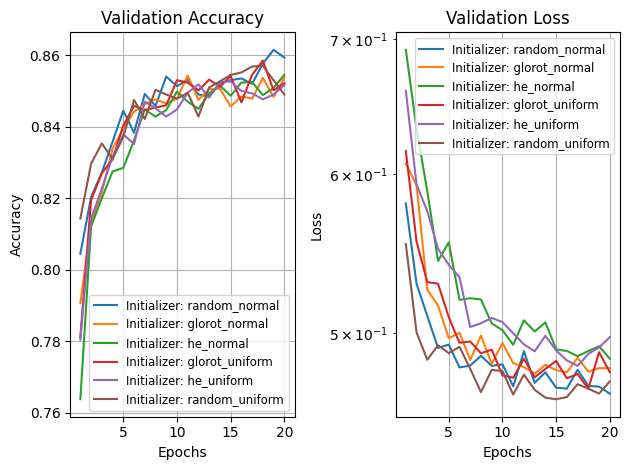

In [ ]:
import matplotlib.pyplot as plt

def plot_initializer_histories(histories):
    plt.subplot(1, 2, 1)
    for initializer, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_accuracy']) + 1), metrics['val_accuracy'], label=f'Initializer: {initializer}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.grid()
    plt.subplot(1, 2, 2)
    for initializer, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_loss']) + 1), metrics['val_loss'], label=f'Initializer: {initializer}')
    plt.yscale('log')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize='small')
    plt.grid()
    plt.tight_layout()
    plt.show()
plot_initializer_histories(initializer_histories)


# Different optimizers for MLP

We chose 6 values like 'adam','adagrad' to train model.


In [ ]:
# Define different optimizers to test
optimizers = ["adam", "sgd", "adagrad", "rmsprop", "adamax", "nadam"]
optimizer_histories = {}
for optimizer_name in optimizers:
    if optimizer_name.lower() == 'adam':
        optimizer_instance = keras.optimizers.Adam(learning_rate)
    elif optimizer_name.lower() == 'sgd':
        optimizer_instance = keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer_name.lower() == 'adagrad':
        optimizer_instance = keras.optimizers.Adagrad(learning_rate)
    elif optimizer_name.lower() == 'rmsprop':
        optimizer_instance = keras.optimizers.RMSprop(learning_rate)
    elif optimizer_name.lower() == 'adamax':
        optimizer_instance = keras.optimizers.Adamax(learning_rate)
    elif optimizer_name.lower() == 'nadam':
        optimizer_instance = keras.optimizers.Nadam(learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")
    kernel_initializer = keras.initializers.GlorotNormal()
    kernel_regularizer = keras.regularizers.l2(Regularization_rate)
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[28, 28]))

    for _ in range(lay_num):
        if dropout == "TRUE":
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer_instance,
                  metrics=["accuracy"])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=1)
    optimizer_histories[optimizer_name] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }
    data_dict = {
        'optimizer': optimizer_name,
        'epochs': epochs,
        'accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }
    df = pd.DataFrame([data_dict])
    csv_file = 'optimizer_results.csv'
    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2478 - loss: 2.0952 - val_accuracy: 0.6593 - val_loss: 0.9308
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5697 - loss: 1.1599 - val_accuracy: 0.7117 - val_loss: 0.7797
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6467 - loss: 0.9715 - val_accuracy: 0.7487 - val_loss: 0.7090
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6831 - loss: 0.8762 - val_accuracy: 0.7648 - val_loss: 0.6627
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7075 - loss: 0.8283 - val_accuracy: 0.7822 - val_loss: 0.6298
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7228 - loss: 0.7872 - val_accuracy: 0.7910 - val_loss: 0.6089
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7327 - loss: 0.7617 - val_accuracy: 0.7967 - val_loss: 0.5864
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7437 - loss: 0.7325 - val_accuracy: 0.

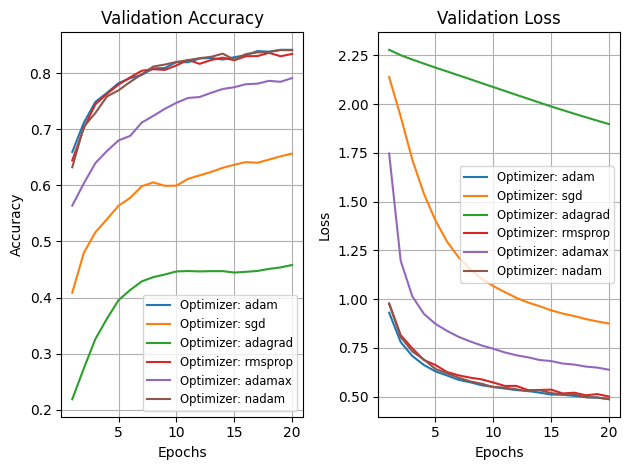

In [ ]:
import matplotlib.pyplot as plt

def plot_optimizer_histories(histories):
    plt.subplot(1, 2, 1)
    for optimizer, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_accuracy']) + 1), metrics['val_accuracy'], label=f'Optimizer: {optimizer}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.grid()
    plt.subplot(1, 2, 2)
    for optimizer, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_loss']) + 1), metrics['val_loss'], label=f'Optimizer: {optimizer}')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize='small')
    plt.grid()
    plt.tight_layout()
    plt.show()
plot_optimizer_histories(optimizer_histories)

# Different batch sizes

we use a list of batch sizes to trian this model. It trains a new model for each zise,logs the training history and save the results into a csv file for comparison.

In [ ]:
# Define different batch sizes to test
batch_sizes = [32, 64, 128, 256]
batch_size_histories = {}
for batch_size in batch_sizes:
    if optimizer.lower() == 'adam':
        optimizer_instance = keras.optimizers.Adam(learning_rate)
    elif optimizer.lower() == 'sgd':
        optimizer_instance = keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer.lower() == 'adagrad':
        optimizer_instance = keras.optimizers.Adagrad(learning_rate)
    elif optimizer.lower() == 'rmsprop':
        optimizer_instance = keras.optimizers.RMSprop(learning_rate)
    elif optimizer.lower() == 'adamax':
        optimizer_instance = keras.optimizers.Adamax(learning_rate)
    elif optimizer.lower() == 'nadam':
        optimizer_instance = keras.optimizers.Nadam(learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    kernel_initializer = keras.initializers.GlorotNormal()
    kernel_regularizer = keras.regularizers.l2(Regularization_rate)
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[28, 28]))

    for _ in range(lay_num):
        if dropout == "TRUE":
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer_instance,
                  metrics=["accuracy"])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=1)
    batch_size_histories[batch_size] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }
    data_dict = {
        'batch_size': batch_size,
        'epochs': epochs,
        'accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }
    df = pd.DataFrame([data_dict])
    csv_file = 'batch_size_results.csv'
    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5423 - loss: 1.2424 - val_accuracy: 0.8100 - val_loss: 0.6059
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7421 - loss: 0.7407 - val_accuracy: 0.7985 - val_loss: 0.5779
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7669 - loss: 0.7007 - val_accuracy: 0.8330 - val_loss: 0.5454
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7777 - loss: 0.6709 - val_accuracy: 0.8377 - val_loss: 0.5185
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7855 - loss: 0.6567 - val_accuracy: 0.8375 - val_loss: 0.5072
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7903 - loss: 0.6488 - val_accuracy: 0.8380 - val_loss: 0.5165
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7892 - loss: 0.6456 - val_accuracy: 0.8288 - val_loss: 0.5276
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7940 - loss: 0.6370 -

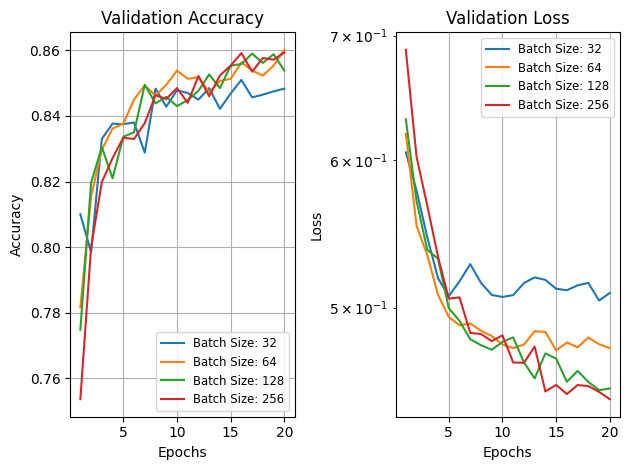

In [ ]:
import matplotlib.pyplot as plt

def plot_batch_size_histories(histories):
    plt.subplot(1, 2, 1)
    for batch_size, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_accuracy']) + 1), metrics['val_accuracy'], label=f'Batch Size: {batch_size}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for batch_size, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_loss']) + 1), metrics['val_loss'], label=f'Batch Size: {batch_size}')
    plt.yscale('log')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize='small')
    plt.grid()
    plt.tight_layout()
    plt.show()
plot_batch_size_histories(batch_size_histories)


# Different lay_nums

We use various numbers of lay-numbers. For each model confuguration, it recordes the model's training history amd store the results in a dictionary.

In [ ]:
lay_nums = [1, 2, 3, 4,5,6,7,8,9,10]
layer_histories = {}
for num_layers in lay_nums:
    if optimizer.lower() == 'adam':
        optimizer_instance = keras.optimizers.Adam(learning_rate)
    elif optimizer.lower() == 'sgd':
        optimizer_instance = keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer.lower() == 'adagrad':
        optimizer_instance = keras.optimizers.Adagrad(learning_rate)
    elif optimizer.lower() == 'rmsprop':
        optimizer_instance = keras.optimizers.RMSprop(learning_rate)
    elif optimizer.lower() == 'adamax':
        optimizer_instance = keras.optimizers.Adamax(learning_rate)
    elif optimizer.lower() == 'nadam':
        optimizer_instance = keras.optimizers.Nadam(learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")
    kernel_initializer = keras.initializers.GlorotNormal()
    kernel_regularizer = keras.regularizers.l2(Regularization_rate)
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[28, 28]))
    for _ in range(num_layers):
        if dropout == "TRUE":
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer_instance,
                  metrics=["accuracy"])
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=1)

    layer_histories[num_layers] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

    data_dict = {
        'num_layers': num_layers,
        'epochs': epochs,
        'accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }

    df = pd.DataFrame([data_dict])
    csv_file = 'layer_results.csv'
    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, mode='w', header=True, index=False)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6297 - loss: 1.0822 - val_accuracy: 0.8028 - val_loss: 0.5669
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.5905 - val_accuracy: 0.8278 - val_loss: 0.5014
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8145 - loss: 0.5484 - val_accuracy: 0.8493 - val_loss: 0.4588
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.5179 - val_accuracy: 0.8500 - val_loss: 0.4415
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.4921 - val_accuracy: 0.8505 - val_loss: 0.4377
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8342 - loss: 0.4841 - val_accuracy: 0.8508 - val_loss: 0.4401
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8361 - loss: 0.4769 - val_accuracy: 0.8672 - val_loss: 0.4069
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8402 - loss: 0.4623 - val_accuracy: 0

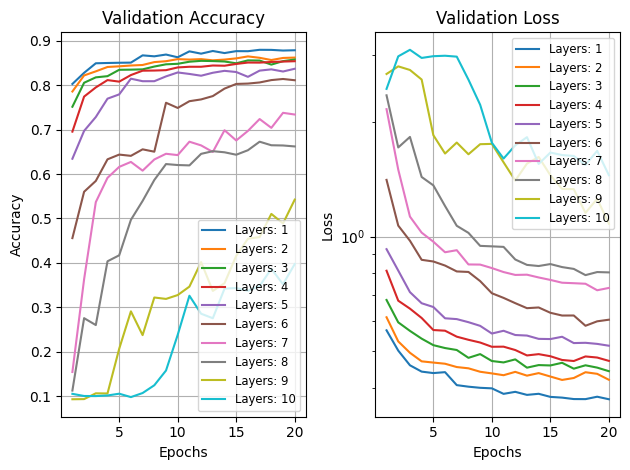

In [ ]:
import matplotlib.pyplot as plt

def plot_layer_histories(histories):
    plt.subplot(1, 2, 1)
    for num_layers, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_accuracy']) + 1), metrics['val_accuracy'], label=f'Layers: {num_layers}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.grid()
    plt.subplot(1, 2, 2)
    for num_layers, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_loss']) + 1), metrics['val_loss'], label=f'Layers: {num_layers}')
    plt.yscale('log')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize='small')
    plt.grid()
    plt.tight_layout()
    plt.show()
plot_layer_histories(layer_histories)


# different dense_units_list

we set different dense layer configurations to identify the model's perforance. It trains a separate netural network model for each number of units in the list and store the training histories and results in both a dictionary and a csv file.

In [ ]:
dense_units_list = [32, 64, 128, 256]
dense_units_histories = {}
for dense_units in dense_units_list:
    if optimizer.lower() == 'adam':
        optimizer_instance = keras.optimizers.Adam(learning_rate)
    elif optimizer.lower() == 'sgd':
        optimizer_instance = keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer.lower() == 'adagrad':
        optimizer_instance = keras.optimizers.Adagrad(learning_rate)
    elif optimizer.lower() == 'rmsprop':
        optimizer_instance = keras.optimizers.RMSprop(learning_rate)
    elif optimizer.lower() == 'adamax':
        optimizer_instance = keras.optimizers.Adamax(learning_rate)
    elif optimizer.lower() == 'nadam':
        optimizer_instance = keras.optimizers.Nadam(learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")
    kernel_initializer = keras.initializers.GlorotNormal()
    kernel_regularizer = keras.regularizers.l2(Regularization_rate)
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=[28, 28]))
    for _ in range(lay_num):
        if dropout == "TRUE":
            model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer_instance,
                  metrics=["accuracy"])
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(val_images, val_labels), verbose=1)
    dense_units_histories[dense_units] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

    data_dict = {
        'dense_units': dense_units,
        'epochs': epochs,
        'accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }
    df = pd.DataFrame([data_dict])
    csv_file = 'dense_units_results.csv'
    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, mode='w', header=True, index=False)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.2276 - loss: 2.0215 - val_accuracy: 0.5513 - val_loss: 1.1276
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5080 - loss: 1.2510 - val_accuracy: 0.6610 - val_loss: 0.9155
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5635 - loss: 1.0984 - val_accuracy: 0.6815 - val_loss: 0.8394
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5965 - loss: 1.0298 - val_accuracy: 0.6675 - val_loss: 0.8140
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6251 - loss: 0.9598 - val_accuracy: 0.6855 - val_loss: 0.7697
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6279 - loss: 0.9470 - val_accuracy: 0.7128 - val_loss: 0.7320
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6381 - loss: 0.9178 - val_accuracy: 0.6747 - val_loss: 0.7500
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6445 - loss: 0.8998 - val_accuracy: 

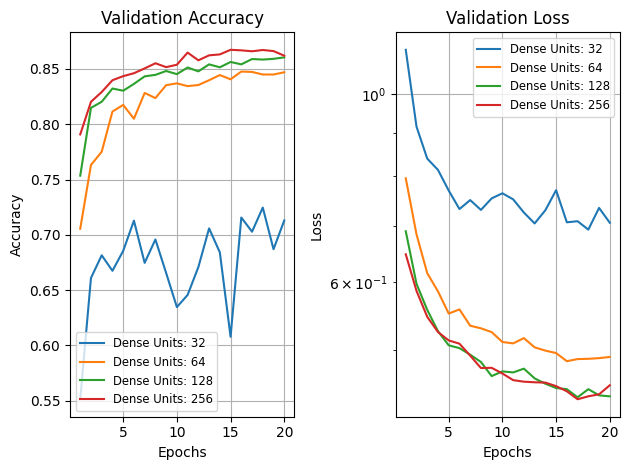

In [ ]:
import matplotlib.pyplot as plt
def plot_dense_units_histories(histories):
    plt.subplot(1, 2, 1)
    for units, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_accuracy']) + 1), metrics['val_accuracy'], label=f'Dense Units: {units}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.grid()
    plt.subplot(1, 2, 2)
    for units, metrics in histories.items():
        plt.plot(range(1, len(metrics['val_loss']) + 1), metrics['val_loss'], label=f'Dense Units: {units}')
    plt.yscale('log')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize='small')
    plt.grid()
    plt.tight_layout()
    plt.show()
plot_dense_units_histories(dense_units_histories)


